In [2]:
import json 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

In [3]:
df = pd.read_csv("Data/choro.tsv", sep="\t",usecols=["root","title","chord"])
print(df)

         chord root       title
0           NC   NC    Atraente
1           C7    C    Atraente
2            F    F    Atraente
3            C    C    Atraente
4           Dm    D    Atraente
...        ...  ...         ...
44062    C6(9)    C  Az de ouro
44063       A7    A  Az de ouro
44064      Dm7    D  Az de ouro
44065  G7(#11)    G  Az de ouro
44066    C6(9)    C  Az de ouro

[44067 rows x 3 columns]


In [104]:
df["root"].unique()

array(['NC', 'C', 'F', 'D', 'G', 'Bb', 'A', 'Eb', 'Ab', 'Db', 'E', 'F#',
       'B', 'G#', 'C#', 'A#', 'D#', 'Gb', 'Fb', 'Cb'], dtype=object)

In [4]:
def chordTransitionDict(df,column):
    chords=df[column].unique()
    chords=chords[chords != "NC"]
    stats={"init" : {key : 0 for key in chords}, "transition" : {currentChord : {nextChord : 0 for nextChord in chords} for currentChord in chords}, "end" : {key : 0 for key in chords}}
    n=len(df)
    if df[column][0]!="NC":   
        stats["init"][df[column][0]]=1
    for i in range(n-1):
        if df["title"][i]==df["title"][i+1]:
            if df[column][i]!="NC" and df[column][i+1]!="NC":
                stats["transition"][df[column][i]][df[column][i+1]]+=1
        else:
            if df[column][i]!="NC":
                stats["end"][df[column][i]]+=1
            if df[column][i+1]!="NC":
                stats["init"][df[column][i+1]]+=1
    return stats
                

In [5]:
def convertToPercent(dico):
    dicoPercent=deepcopy(dico)
    ninit=sum(dicoPercent["init"].values())
    dicoPercent["init"]={key: round(value/max(ninit,1),2) for key, value in dicoPercent["init"].items()}
    for key in dicoPercent["transition"].keys():
        ntrans=sum(dicoPercent["transition"][key].values())
        #print(key,ntrans)
        dicoPercent["transition"][key]={key: round(value/max(ntrans,1),2) for key, value in dicoPercent["transition"][key].items()}
    nend=sum(dicoPercent["end"].values())
    dicoPercent["end"]={key: round(value/max(nend,1),2) for key, value in dicoPercent["end"].items()}
    return dicoPercent

In [6]:
def plotHistogram(dico):
    values,keys= map(list, zip(*sorted(zip(dico.values(),dico.keys()), reverse=True)))
    plt.bar(keys, values, width=0.8,edgecolor='black')
    for i in range(len(keys)):
        plt.text(i, values[i], str(values[i]), ha='center', va='bottom')
    plt.show()

In [8]:
out_file = open("Statistic/statsRoot.json", "w") 
json.dump(chordTransitionDict(df,"root"), out_file, indent = 6) 
out_file.close()
out_file = open("Statistic/statsChord.json", "w") 
json.dump(chordTransitionDict(df,"chord"), out_file, indent = 6) 
out_file.close()

In [9]:
f = open('Statistic/statsRoot.json',) 
stats = json.load(f) 
f.close() 
statsPercent=convertToPercent(stats)

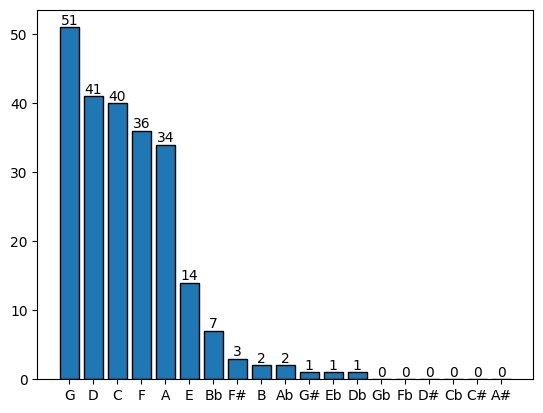

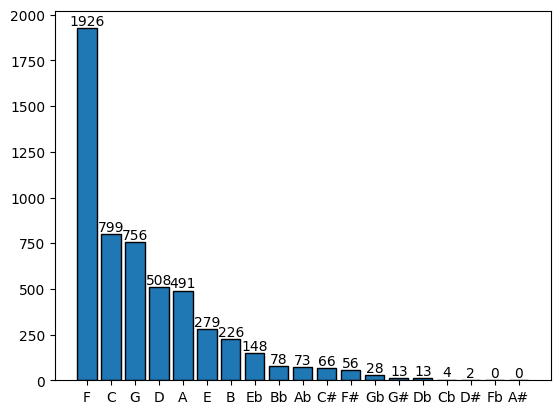

In [10]:
plotHistogram(stats["init"])
plotHistogram(stats["transition"]["C"])

Lisa
